In [211]:
import cirq
from cirq.contrib.svg import SVGCircuit
import numpy as np
from imp import reload
from LQG import tetrahedra_num as tn
from LQG import tetrahedra_circuits as tc
import LQG
reload(LQG.tetrahedra_num)
reload(LQG.tetrahedra_circuits)

<module 'LQG.tetrahedra_circuits' from '/home/espresso/SynologyDrive/edu-resources/quantum-programming/csci-581-lqg/LQG/tetrahedra_circuits.py'>

# Quantum Tetrahedron State Preparation

In [190]:
def tetra_0s(qubits):
    ''' make the |0L> circuit 
    '''
    if len(qubits) != 4:
        print('error, tried to make tetrahadron without n=4 qubits')
        exit(1)
    yield cirq.X.on_each(qubits)
    yield cirq.H.on_each(qubits[::2])
    yield cirq.CNOT(qubits[0],qubits[1])
    yield cirq.CNOT(qubits[2],qubits[3])
    
def cnots(qubit_pairs):
    ''' take a list of pairs of qubits, CNOT each individual list
    '''
    for pair in qubit_pairs:
        yield cirq.CNOT(pair[0],pair[1])
        
def cnots(qubits,qubit_pairs):
    ''' take a list of pairs of qubits, CNOT each individual list
    '''
    for pair in qubit_pairs:
        yield cirq.CNOT(qubits[pair[0]],qubits[pair[1]])       
def end_vec(circuit):
    ''' get predicted end state of a circuit
    '''
    sim = cirq.Simulator()
    end = sim.simulate(circuit)
    return end
    


In [185]:
qubits = cirq.LineQubit.range(8)
bit_flip = cirq.bit_flip(p=.1)

'''test the monopole amplitude
'''
circuit = cirq.Circuit( [cirq.H(qubits[0]),
                         cirq.H(qubits[1]),
                         cirq.CNOT(qubits[1],qubits[2])**-1,
                         cirq.X(qubits[2]),
                         cnots([(qubits[0],qubits[1]),
                                (qubits[2],qubits[3]),
                                (qubits[1],qubits[2]),
                                (qubits[0],qubits[3])]),
                         bit_flip.on_each(qubits[:4])])

circuit.append([cirq.H.on_each(qubits[:2]), cirq.X.on_each(qubits[:4])])
end = end_vec(circuit).final_state_vector
target = tet.L_zero
print('Test monopole |0L>, should be ~0.25: ', np.abs(np.dot(target,end))**2)


''' test the state preparation
'''
circuit = cirq.Circuit(tetra_0s(qubits[:4]), tetra_0s(qubits[4:]))
end = end_vec(circuit).final_state_vector
target = np.kron(tet.L_zero,sp.L_zero)
print('Test |0L> state prep, should be ~1: ',np.dot(end, target))

circuit = cirq.Circuit(tc.TetrahedronStatePrep(qubits[:4],0,0))
target = tet.L_zero
end = end_vec(circuit).final_state_vector
print('Test arbitrary state prep with 0,0: ',np.dot(end,target))



Test monopole |0L>, should be ~0.25:  0.24999994039535878
Test |0L> state prep, should be ~1:  (0.9999998807907104+0j)
[[ 0.+0.j  1.+0.j]
 [-1.+0.j  0.-0.j]]
Test arbitrary state prep with 0,0:  (0.9999999403953552+0j)


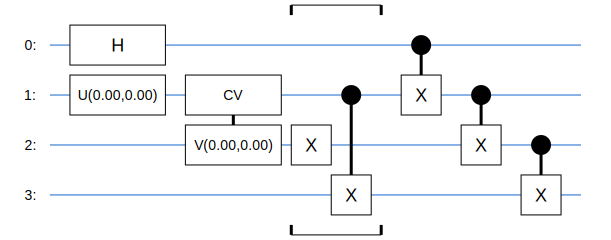

In [186]:
SVGCircuit(circuit)

# Entangling States

                                             ┌──┐
0: ────H─────────────────────────────@────────@─────
                                     │        │
1: ────U(0.00,0.00)───CV─────────────X────────┼@────
                      │                       ││
2: ───────────────────V(0.00,0.00)───X───@────┼X────
                                         │    │
3: ──────────────────────────────────────X────X─────

4: ────H─────────────────────────────@────────@─────
                                     │        │
5: ────U(0.00,0.00)───CV─────────────X────────┼@────
                      │                       ││
6: ───────────────────V(0.00,0.00)───X───@────┼X────
                                         │    │
7: ──────────────────────────────────────X────X─────

8: ────H─────────────────────────────@────────@─────
                                     │        │
9: ────U(0.00,0.00)───CV─────────────X────────┼@────
                      │                       ││
10: ──────────────────V(0.00,0.

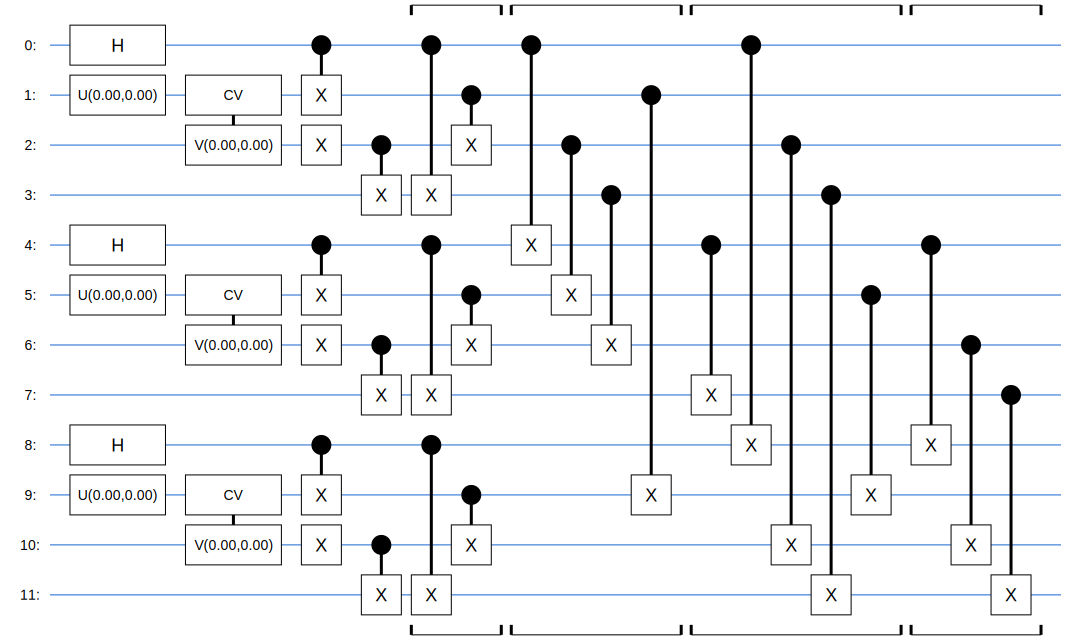

In [195]:
qubits = cirq.LineQubit.range(12)

c = cirq.Circuit(tc.ZeroTet(qubits[:4]),tc.ZeroTet(qubits[4:8]),tc.ZeroTet(qubits[8:]))
print(c)
c.append(cnots(qubits,[[0,4],[2,5],[3,6],[4,7],
                       [0,8],[1,9],[2,10],[3,11],
                       [4,8],[5,9],[6,10],[7,11]]),
        strategy=cirq.InsertStrategy.EARLIEST)
SVGCircuit(c)

In [196]:
# S, sqrtiswap, single qubit rotations

In [207]:
def sqrtISWAP(q1,q2):
    return cirq.ISWAP(q1,q2)**-.5
Q = cirq.LineQubit.range(4)
c = cirq.Circuit(cirq.H(Q[0]),
                 tc.UGate(0,0).on(Q[1]),
                 tc.CVGate(0,0).on(Q[1],Q[2]),
                 cirq.X(Q[2]),
                 sqrtISWAP(Q[0],Q[1]),
                 sqrtISWAP(Q[1],Q[2]),
                 sqrtISWAP(Q[2],Q[3]),
                 #sqrtISWAP(Q[3],Q[2]),
                 #sqrtISWAP(Q[0],Q[3]),
                 #sqrtISWAP(Q[1],Q[2]),
                )
print(c)
print(end_vec(c))


0: ───H─────────────────────────────iSwap──────────────────────────────────
                                    │
1: ───U(0.00,0.00)───CV─────────────iSwap^-0.5───iSwap─────────────────────
                     │                           │
2: ──────────────────V(0.00,0.00)───X────────────iSwap^-0.5───iSwap────────
                                                              │
3: ───────────────────────────────────────────────────────────iSwap^-0.5───
measurements: (no measurements)
output vector: 0.177|0001⟩ + 0.177j|0010⟩ - 0.25|0100⟩ - 0.25j|0101⟩ + 0.25|0110⟩ + 0.354j|1000⟩ + 0.073|1001⟩ + 0.073j|1010⟩ - 0.604|1100⟩ - 0.354j|1101⟩ + 0.354|1110⟩


0.006944442788759969


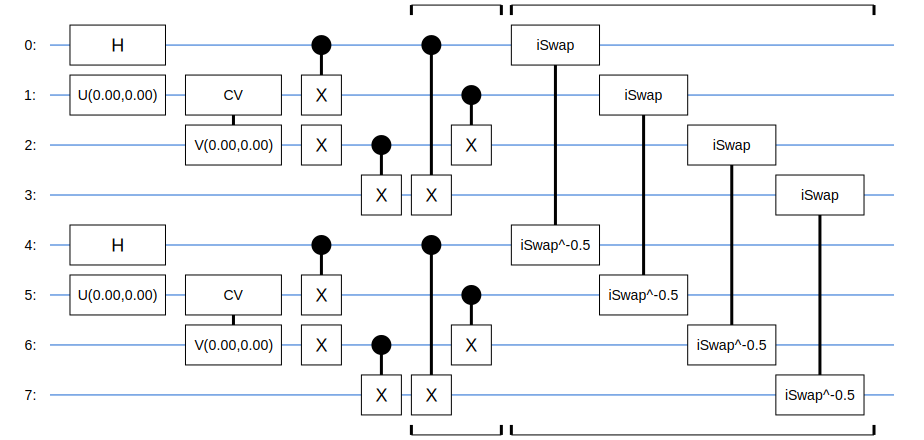

In [217]:
Q = cirq.LineQubit.range(8)
c = cirq.Circuit(tc.ZeroTet(Q[:4]),tc.ZeroTet(Q[4:]))
c.append([sqrtISWAP(Q[0],Q[4]),sqrtISWAP(Q[1],Q[5]),sqrtISWAP(Q[2],Q[6]),sqrtISWAP(Q[3],Q[7])])
c.append([])
print(tn.overlap(end_vec(c).final_state_vector, np.kron(tn.L_one,tn.L_one)))
SVGCircuit(c)